In [1]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import os
import torch


In [2]:
from torch.utils.data import DataLoader


In [3]:
from data.dataloader import CustomDataset
from data.utils import DataTransform
from model.blocks.contourlet import ContourletTransform
from model.blocks.unet import UNet


/home/user/anaconda3/envs/jih_icicic/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
transform=DataTransform(image_size=640)

dataset = CustomDataset(
    path="data/1_train/1_LOLdataset",
    transform=transform
)


In [5]:
dataloader = DataLoader(
    dataset=dataset,
    batch_size=16,
    shuffle=True,
    num_workers=int(os.cpu_count() * 0.9),
    persistent_workers=True,
    pin_memory=True
)


In [6]:
data = next(iter(dataloader))
print(data.shape)


torch.Size([16, 3, 640, 640])


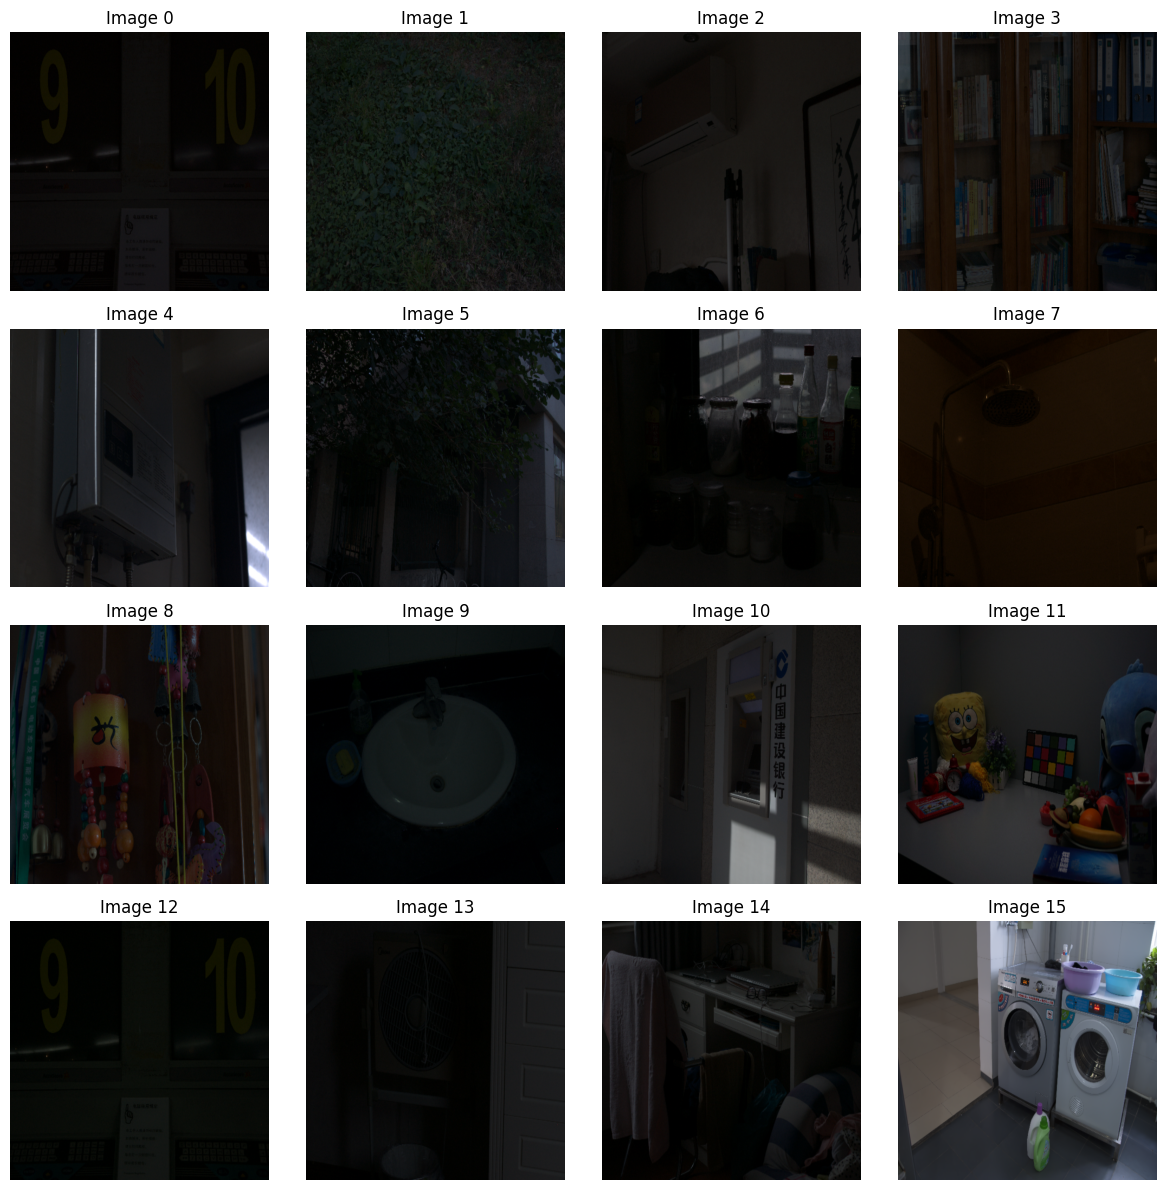

In [7]:
def show_batch(images, ncols=4):
    nimgs = images.shape[0]
    nrows = (nimgs + ncols - 1) // ncols
    plt.figure(figsize=(ncols * 3, nrows * 3))
    for i in range(nimgs):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(F.to_pil_image(images[i]))
        plt.axis('off')
        plt.title(f"Image {i}")
    plt.tight_layout()
    plt.show()

show_batch(data)


In [ ]:
contourlet = ContourletTransform(
    num_levels=3,
    filter_size=5,
    sigma=1.0,
    omega_x=0.25,
    omega_y=0.25,
    channels=3
)

pyramid, subbands = contourlet(data)
show_batch(pyramid[-1])


/home/user/anaconda3/envs/jih_icicic/lib/python3.11/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
t = torch.randint(low=0, high=10000, size=(16,))
rn = UNet(in_channels=3, out_channels=3, hidden_channels=64, num_levels=3, temb_dim=64, dropout=0.1, shortcut=True, trainable=False)

rn_d = rn(pyramid[-1], t)

show_batch(rn_d)


t_freq shape: torch.Size([16, 64]), t: torch.Size([16])


OutOfMemoryError: CUDA out of memory. Tried to allocate 10000.00 GiB. GPU 0 has a total capacity of 47.53 GiB of which 12.25 GiB is free. Process 8553 has 260.00 MiB memory in use. Including non-PyTorch memory, this process has 35.00 GiB memory in use. Of the allocated memory 34.69 GiB is allocated by PyTorch, and 9.77 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)